In [3]:
import pickle
import pandas as pd
import numpy as np
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
def binary_decision(dec):
    if dec == 'A':return 1
    else: return 0

In [5]:
with open('featuresDFwCat.pkl', 'rb') as fobj:
    df = pickle.load(fobj, encoding='latin1')
with open('updatedProfiles.pkl', 'rb') as fobj:
    df_raw = pickle.load(fobj, encoding='latin1')
        
df.head()

,school,gpa,act,sat1,ap_count,ap_mean,sat2_count,sat2_mean,country,rank,gender,ethnicity,urm,first_generation,ec_count,decision
0,yale,3.848229,33.355673,2238.482192,0.0,2.051209e+06,0.0,2.051209e+06,US,0.027004,None,None,0,0,0,0
1,yale,4.000000,33.355673,2350.000000,6.0,5.000000e+00,6.0,5.000000e+00,US,0.000000,M,None,0,0,1,0
2,yale,4.000000,33.355673,2238.482192,12.0,4.666667e+00,12.0,4.666667e+00,US,0.027004,F,asian,0,0,0,0
3,yale,3.500000,33.355673,2320.000000,0.0,2.051209e+06,0.0,2.051209e+06,US,0.000000,M,indian,0,0,2,0
4,yale,3.848229,33.355673,2238.482192,0.0,2.051209e+06,0.0,2.051209e+06,US,0.027004,F,asian,0,0,0,0


In [63]:
df['decision'].mean()

0.5762588178058866

In [7]:
df = df.loc[df.act != 1]

In [30]:
score_map = {36: 2390, 35: 2330, 34:2250, 33.35567282:2220, 33:2180, 32:2120, 31:2060, 30:2000, 
             29:1940, 28:1880, 27:1820, 26:1770, 25:1710, 24:1650, 23:1590, 22:1530, 21:1470, 1:600, 0:0, 40:0}
sat_mode = float(df['sat1'].mode())
act_mode = int(df['act'].mode())
gpa_mode = float(df['gpa'].mode())

In [31]:
df_raw2 = df_raw[['gpa','act', 'sat1', 'decision']].copy(deep = True)
df_raw2['decision'] = df_raw2['decision'].apply(binary_decision)
df_raw2['act'] = df_raw2['act'].astype(int)

In [32]:
def get_best_test(row):
    if row.act == 0:
        return pd.Series({'test_type': 'sat', 'test_score': row.sat1_round})
    elif row.sat1 == 0:
        return pd.Series({'test_type': 'act', 'test_score': score_map.get(row.act)})
    else:
#         print(row.act)
        if row.sat1_round > score_map.get(row.act):
            return pd.Series({'test_type': 'sat', 'test_score': row.sat1_round})
        else:
            return pd.Series({'test_type': 'act', 'test_score': score_map.get(row.act)})

In [33]:
def myround(x, base=25):
    return int(base * round(float(x)/base))
df_raw2['sat1_round'] = df_raw2['sat1'].apply(myround)

In [34]:
df_raw3['act'].unique()

array([ 0, 34, 33, 35, 36, 32, 29, 31, 30, 28, 27,  1, 22, 25, 26, 24, 40])

In [35]:
df_raw3 = df_raw2.loc[((df_raw2.gpa != 0) & ((df_raw2.sat1 != 0) | (df_raw2.act != 0)))].copy(deep = True)
# df_raw3
df_raw3[['test_score','test_type']] = df_raw3.apply(get_best_test, axis = 1)

In [36]:
df_graph = df_raw3
df_graph.head()

,gpa,act,sat1,decision,sat1_round,test_score,test_type
1,4.00,0,2350,0,2350,2350.0,sat
3,3.50,0,2320,0,2325,2325.0,sat
5,3.93,34,0,0,0,2250.0,act
6,4.00,33,2230,0,2225,2225.0,sat
7,4.00,35,2310,0,2300,2330.0,act


In [ ]:
# acc = df2.loc[df.decision == 1]
# rej = df2.loc[df.decision == 0]
# # rewaj = df.loc[df.decision == 1]

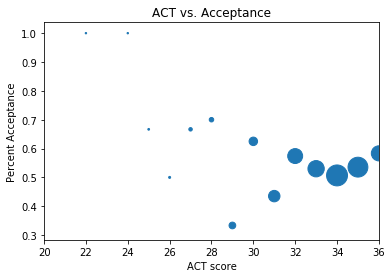

In [37]:
g = df_graph.groupby(by = 'act')['decision'].agg(['mean','count']).reset_index()

plt.scatter(g['act'], g['mean'], s=g['count'])
plt.xlim(20, 36)
plt.xlabel('ACT score')
plt.ylabel('Percent Acceptance')
plt.title('ACT vs. Acceptance')
plt.show()

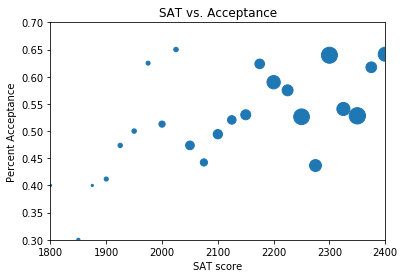

In [38]:
g = df_graph.groupby(by = 'sat1_round')['decision'].agg(['mean','count']).reset_index()

plt.scatter(g['sat1_round'], g['mean'], s=g['count'])
plt.xlim(1800, 2400)
plt.ylim(.3, .7)
plt.xlabel('SAT score')
plt.ylabel('Percent Acceptance')
plt.title('SAT vs. Acceptance')
plt.show()

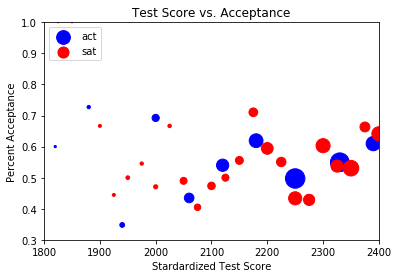

In [40]:
g = df_graph.groupby(by = ['test_type', 'test_score'])['decision'].agg(['mean','count']).reset_index()
g_act = g.loc[g.test_type == 'act']
g_sat = g.loc[g.test_type == 'sat']

plt.scatter(g_act['test_score'], g_act['mean'], s=g_act['count'], c = 'b', label = 'act')
plt.scatter(g_sat['test_score'], g_sat['mean'], s=g_sat['count'], c = 'r', label = 'sat')

plt.xlim(1800, 2400)
plt.ylim(.3, 1)
plt.xlabel('Stardardized Test Score')
plt.ylabel('Percent Acceptance')
plt.title('Test Score vs. Acceptance')
plt.legend(loc='upper left')
plt.show()

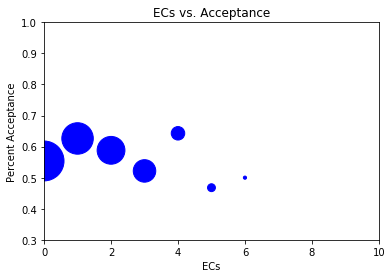

In [41]:
g = df.groupby(by = ['ec_count'])['decision'].agg(['mean','count']).reset_index()
plt.scatter(g['ec_count'], g['mean'], s=g['count'], c = 'b', label = 'act')

plt.xlim(0, 10)
plt.ylim(.3, 1)
plt.xlabel('ECs')
plt.ylabel('Percent Acceptance')
plt.title('ECs vs. Acceptance')
plt.show()

In [47]:
def decround(x, base=10):
    x = x * 100
    x = int(base * round(float(x)/base))
    return x/100
df['gpa_round'] = df['gpa'].apply(decround)

In [66]:
df.head(10)
# df['gpa'].unique()

,school,gpa,act,sat1,ap_count,ap_mean,sat2_count,sat2_mean,country,rank,gender,ethnicity,urm,first_generation,ec_count,decision,gpa_round,urmstr,fg,rank_round
0,yale,3.848229,33.355673,2238.482192,0.0,2.051209e+06,0.0,2.051209e+06,US,0.027004,None,None,0,0,0,0,3.8,0,0,0.0
1,yale,4.000000,33.355673,2350.000000,6.0,5.000000e+00,6.0,5.000000e+00,US,0.000000,M,None,0,0,1,0,4.0,0,0,0.0
2,yale,4.000000,33.355673,2238.482192,12.0,4.666667e+00,12.0,4.666667e+00,US,0.027004,F,asian,0,0,0,0,4.0,0,0,0.0
3,yale,3.500000,33.355673,2320.000000,0.0,2.051209e+06,0.0,2.051209e+06,US,0.000000,M,indian,0,0,2,0,3.5,0,0,0.0
4,yale,3.848229,33.355673,2238.482192,0.0,2.051209e+06,0.0,2.051209e+06,US,0.027004,F,asian,0,0,0,0,3.8,0,0,0.0
5,yale,3.930000,34.000000,2238.482192,5.0,3.800000e+00,5.0,3.800000e+00,US,0.027004,F,caucasian,0,0,4,0,3.9,0,0,0.0
6,yale,4.000000,33.000000,2230.000000,8.0,4.500000e+00,8.0,4.500000e+00,US,0.000000,M,asian,0,0,0,0,4.0,0,0,0.0
7,yale,4.000000,35.000000,2310.000000,7.0,4.857143e+00,7.0,4.857143e+00,US,0.008333,F,caucasian,0,0,5,0,4.0,0,0,0.0
8,yale,3.848229,36.000000,2238.482192,0.0,2.051209e+06,0.0,2.051209e+06,US,0.027004,M,asian,0,0,0,1,3.8,0,0,0.0
9,yale,3.900000,33.355673,2260.000000,1.0,5.000000e+00,1.0,5.000000e+00,US,0.000000,M,asian,0,0,0,0,3.9,0,0,0.0


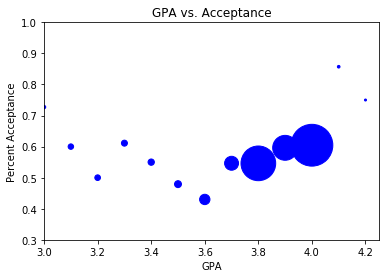

In [49]:
g = df.groupby(by = ['gpa_round'])['decision'].agg(['mean','count']).reset_index()
plt.scatter(g['gpa_round'], g['mean'], s=g['count'], c = 'b', label = 'act')

plt.xlim(3, 4.25)
plt.ylim(.3, 1)
plt.xlabel('GPA')
plt.ylabel('Percent Acceptance')
plt.title('GPA vs. Acceptance')
plt.show()

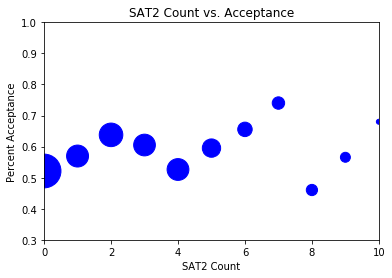

In [50]:
g = df.groupby(by = ['sat2_count'])['decision'].agg(['mean','count']).reset_index()
plt.scatter(g['sat2_count'], g['mean'], s=g['count'], c = 'b', label = 'act')

plt.xlim(0, 10)
plt.ylim(.3, 1)
plt.xlabel('SAT2 Count')
plt.ylabel('Percent Acceptance')
plt.title('SAT2 Count vs. Acceptance')
plt.show()

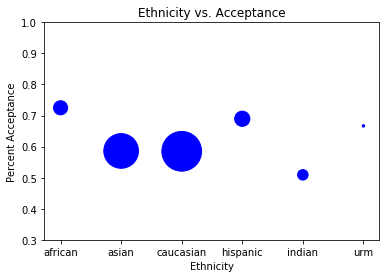

In [52]:
g = df.groupby(by = ['ethnicity'])['decision'].agg(['mean','count']).reset_index()
plt.scatter(g['ethnicity'], g['mean'], s=g['count'], c = 'b', label = 'act')

plt.ylim(.3, 1)
plt.xlabel('Ethnicity')
plt.ylabel('Percent Acceptance')
plt.title('Ethnicity vs. Acceptance')
plt.show()

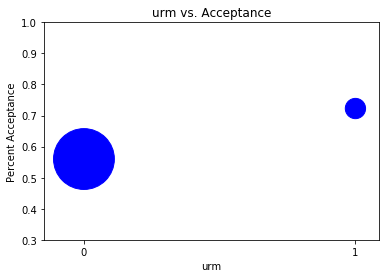

In [54]:
df['urmstr'] = df['urm'].astype(str)
g = df.groupby(by = ['urmstr'])['decision'].agg(['mean','count']).reset_index()
plt.scatter(g['urmstr'], g['mean'], s=g['count'], c = 'b', label = 'act')

# plt.xlim(0, 10)
plt.ylim(.3, 1)
plt.xlabel('urm')
plt.ylabel('Percent Acceptance')
plt.title('urm vs. Acceptance')
plt.show()

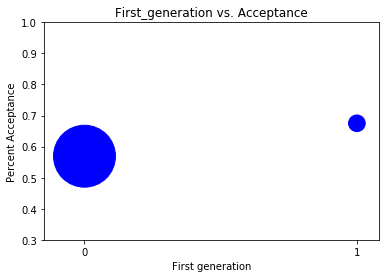

In [58]:
df['fg'] = df['first_generation'].astype(str)
g = df.groupby(by = ['fg'])['decision'].agg(['mean','count']).reset_index()
plt.scatter(g['fg'], g['mean'], s=g['count'], c = 'b', label = 'act')

# plt.xlim(0, 10)
plt.ylim(.3, 1)
plt.xlabel('First generation')
plt.ylabel('Percent Acceptance')
plt.title('First_generation vs. Acceptance')
plt.show()

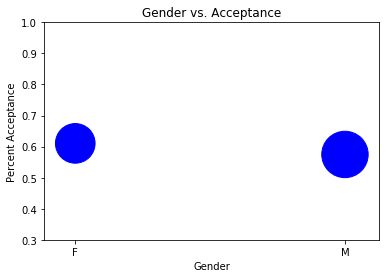

In [60]:
g = df.groupby(by = ['gender'])['decision'].agg(['mean','count']).reset_index()
plt.scatter(g['gender'], g['mean'], s=g['count'], c = 'b', label = 'act')

plt.ylim(.3, 1)
plt.xlabel('Gender')
plt.ylabel('Percent Acceptance')
plt.title('Gender vs. Acceptance')
plt.show()

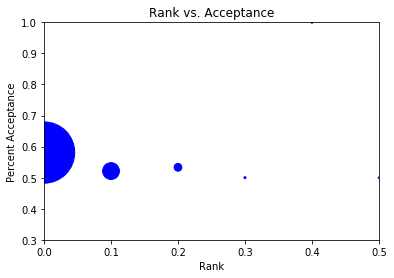

In [62]:
df['rank_round'] = df['rank'].apply(decround)
g = df.groupby(by = ['rank_round'])['decision'].agg(['mean','count']).reset_index()
plt.scatter(g['rank_round'], g['mean'], s=g['count'], c = 'b', label = 'act')

plt.xlim(0, .5)
plt.ylim(.3, 1)
plt.xlabel('Rank')
plt.ylabel('Percent Acceptance')
plt.title('Rank vs. Acceptance')
plt.show()

In [ ]:
g = df.groupby(by = ['rank_round'])['decision'].agg(['mean','count']).reset_index()
plt.scatter(g['rank_round'], g['mean'], s=g['count'], c = 'b', label = 'act')

plt.xlim(0, .5)
plt.ylim(.3, 1)
plt.xlabel('Rank')
plt.ylabel('Percent Acceptance')
plt.title('Rank vs. Acceptance')
plt.show()

In [ ]:
bins = np.linspace(1800, 2400, 12)
plt.hist(acc['sat1'], bins, alpha=0.5, label='acc')
plt.hist(rej['sat1'], bins, alpha=0.5, label='rej')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# plt.figure()
df.hist(column = 'act')
df.hist(column = 'sat1')
df.hist(column = 'gpa')
df.hist(column = 'rank')

In [ ]:
df.plot.scatter(x='ec_count', y='decision')